---


<img width=25% src="https://raw.githubusercontent.com/gabrielcapela/credit_risk/main/images/myself.png" align=right>

# **Credit Risk Assessment Project**

*by Gabriel Capela*

[<img src="https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white"/>](https://www.linkedin.com/in/gabrielcapela)
[<img src="https://img.shields.io/badge/Medium-12100E?style=for-the-badge&logo=medium&logoColor=white" />](https://medium.com/@gabrielcapela)

---

This project aims to develop a **Machine Learning model capable of predicting the probability of customer default** at the time of a credit card application, even before any payment history is available.

Default prediction is critical to minimize financial losses, preserve institutional credibility, and provide fair and efficient access to credit. However, the task is challenging due to limited data at the application stage, potential classification errors (false positives/negatives), and the need for representative historical data.

The ultimate goal is to provide financial institutions with a **data-driven decision-support tool** that improves the accuracy and fairness of credit approval processes.



<p align="center">
<img width=90% src="https://raw.githubusercontent.com/gabrielcapela/credit_risk/main/images/crisp-dm.jpeg">
</p>



This notebook will cover the **last three phases** of the project: Modeling, Evaluation and Deployment.

#  Modeling

This step will follow the following sequence: First, we will **create a pipeline** for training multiple models, after which **two models will be chosen** to move forward. These two models will be **hyperparameterized** and, finally, they will perharps be combined into a **ensemble model**.

In [135]:
# Importing the data
import pandas as pd
X_train= pd.read_csv("../data/X_train.csv")
X_test= pd.read_csv("../data/X_test.csv")
y_train= pd.read_csv("../data/y_train.csv")
y_test= pd.read_csv("../data/y_test.csv")

print(f'The X_train shape is {X_train.shape[0]} x {X_train.shape[1]}')
print(f'The X_test shape is {X_test.shape[0]} x {X_test.shape[1]}')
print(f'The y_train shape is {y_train.shape[0]} x {y_train.shape[1]}')
print(f'The y_test shape is {y_test.shape[0]} x {y_test.shape[1]}')


The X_train shape is 26837 x 43
The X_test shape is 11502 x 43
The y_train shape is 26837 x 1
The y_test shape is 11502 x 1


In [136]:
pd.set_option('display.max_columns', None) 
X_train.head()

,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,score_1_1Rk8w4Ucd5yR3KcqZzLdow==,score_1_4DLlLW62jReXaqbPaHp1vQ==,score_1_8k8UDR4Yx0qasAjkGrUZLw==,score_1_DGCQep2AE5QRkNCshIAlFQ==,score_1_e4NYDor1NOw6XKGE60AWFw==,score_1_fyrlulOiZ+5hoFqLa6UbDQ==,score_1_smzX0nxh5QlePvtVf6EAeg==,facebook_profile_False,facebook_profile_True,facebook_profile_not provided,real_state_+qWF9pJpVGtTFn4vFjb/cg==,real_state_N5/CE7lSkAfB04hVFFwllw==,real_state_UX7AdFYgQh+VrVC5eIaU9w==,real_state_n+xK9CfX0bCn77lClTWviw==,real_state_nSpvDsIsslUaX6GE6m6eQA==,target_fraud_fraud_friends_family,target_fraud_fraud_id,target_fraud_without fraud,application_time_category_00-06,application_time_category_06-12,application_time_category_12-18,application_time_category_18-00
0,0.257908,340.0,99.152286,0.847020,92.870042,0.26,0.00,0.0,20184.0,40019.80,38.0,0.0,0.0,4.0,4.0,19,2,0.0,40.0,544,76109.0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
1,0.158149,340.0,101.423644,0.210806,99.129450,0.20,0.00,0.0,0.0,48317.98,44.0,0.0,0.0,7.0,7.0,342,2,0.0,26.0,253,140446.0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
2,0.098999,570.0,95.921783,0.832893,98.034083,0.23,0.00,0.0,35608.0,60030.76,0.0,0.0,0.0,9.0,9.0,151,1,0.0,3.0,414,97117.0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0
3,0.033755,390.0,98.590815,0.587373,96.835089,0.11,15012.31,36.0,27642.0,46531.29,0.0,0.0,0.0,12.0,12.0,202,3,1.0,50.0,230,51217.0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
4,0.111632,420.0,97.737889,0.705368,102.029359,0.40,0.00,0.0,0.0,57747.06,0.0,0.0,0.0,7.0,0.0,477,1,0.0,15.0,58,104002.0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0


## Baseline

A baseline model provides a **simple performance reference** to evaluate more complex models. It helps identify if your advanced techniques are truly adding value. Without it, there's no clear benchmark for improvement.

=== Logistic Regression Baseline (Validation Set) ===
Accuracy : 0.8428
F1-Score : 0.0000
LogLoss  : 0.4380

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      4524
           1       0.00      0.00      0.00       844

    accuracy                           0.84      5368
   macro avg       0.42      0.50      0.46      5368
weighted avg       0.71      0.84      0.77      5368



/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division`

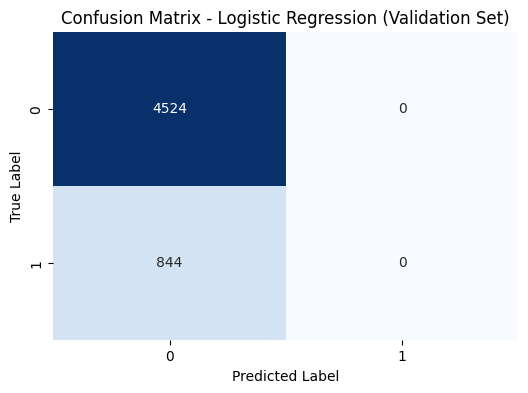

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    f1_score, log_loss, confusion_matrix,
    classification_report, accuracy_score
)
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Split the training data into train and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Train a simple Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_split, y_train_split.values.ravel()) 


# Make predictions on validation set
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)

# Evaluate metrics on validation set
f1 = f1_score(y_val, y_pred)
ll = log_loss(y_val, y_proba)
accuracy = accuracy_score(y_val, y_pred)

# Print classification report
print("=== Logistic Regression Baseline (Validation Set) ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"F1-Score : {f1:.4f}")
print(f"LogLoss  : {ll:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression (Validation Set)")
plt.show()


The model is biased towards the majority class, as evidenced by the lack of predictions for the minority class. To improve performance, it's crucial to address class imbalance using techniques like class weighting or resampling.

## Creating a Pipeline

A Pipeline is used to streamline the machine learning workflow by **chaining together preprocessing steps—such** as data scaling and sampling techniques—with model training. This structure helps avoid code repetition and makes it easier to test multiple models consistently. 

Alongside that, we apply **cross-validation** (CV), a technique that splits the training data into several folds to train and evaluate the model multiple times. This ensures a more reliable assessment of model performance, reduces overfitting, and provides more robust evaluation metrics by averaging results across different data partitions.


Modelo: Logistic Regression | Balanceamento: SMOTE


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia: 0.4871
F1-Score (classe 1): 0.2688
LogLoss: 0.6914

Classification Report:
              precision    recall  f1-score   support

           0     0.8619    0.4662    0.6051      4524
           1     0.1732    0.5995    0.2688       844

    accuracy                         0.4871      5368
   macro avg     0.5176    0.5329    0.4369      5368
weighted avg     0.7536    0.4871    0.5522      5368



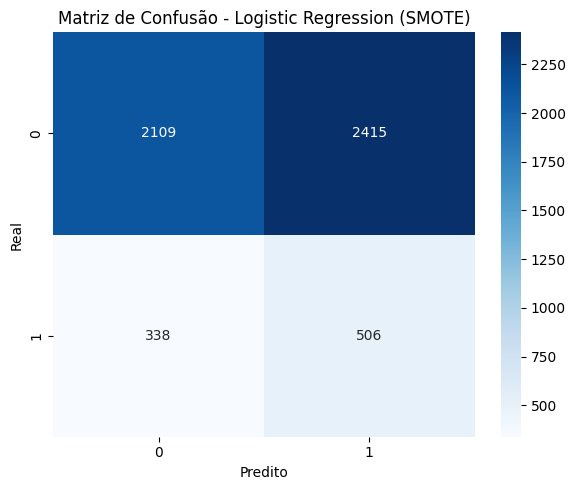


Modelo: Logistic Regression | Balanceamento: UnderSampling


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia: 0.5136
F1-Score (classe 1): 0.2593
LogLoss: 0.6894

Classification Report:
              precision    recall  f1-score   support

           0     0.8560    0.5084    0.6379      4524
           1     0.1705    0.5415    0.2593       844

    accuracy                         0.5136      5368
   macro avg     0.5132    0.5249    0.4486      5368
weighted avg     0.7482    0.5136    0.5784      5368



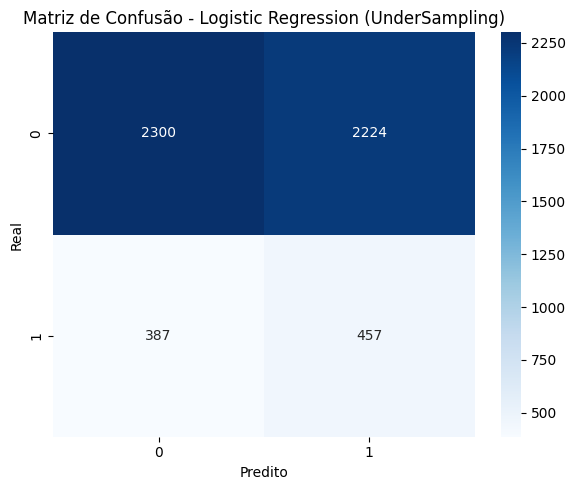


Modelo: Random Forest | Balanceamento: SMOTE


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Acurácia: 0.8573
F1-Score (classe 1): 0.2921
LogLoss: 0.3879

Classification Report:
              precision    recall  f1-score   support

           0     0.8663    0.9823    0.9207      4524
           1     0.6639    0.1872    0.2921       844

    accuracy                         0.8573      5368
   macro avg     0.7651    0.5848    0.6064      5368
weighted avg     0.8345    0.8573    0.8218      5368



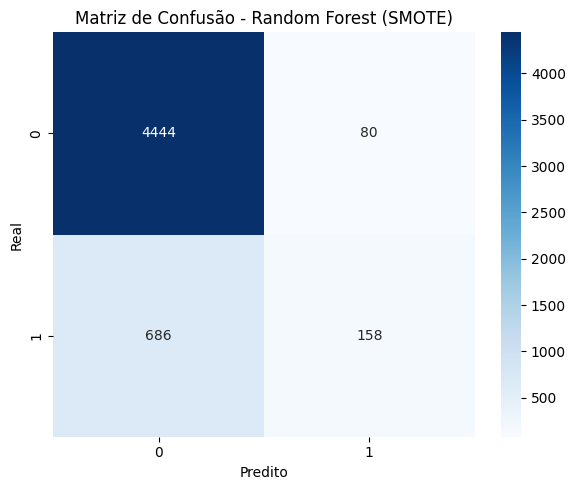


Modelo: Random Forest | Balanceamento: UnderSampling


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Acurácia: 0.6846
F1-Score (classe 1): 0.3873
LogLoss: 0.5934

Classification Report:
              precision    recall  f1-score   support

           0     0.9104    0.6941    0.7877      4524
           1     0.2788    0.6339    0.3873       844

    accuracy                         0.6846      5368
   macro avg     0.5946    0.6640    0.5875      5368
weighted avg     0.8111    0.6846    0.7247      5368



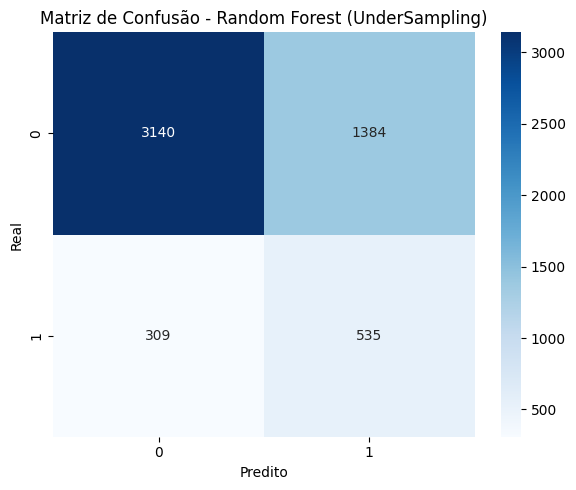


Modelo: K-Nearest Neighbors | Balanceamento: SMOTE


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Acurácia: 0.5974
F1-Score (classe 1): 0.2274
LogLoss: 4.3762

Classification Report:
              precision    recall  f1-score   support

           0     0.8460    0.6386    0.7278      4524
           1     0.1628    0.3768    0.2274       844

    accuracy                         0.5974      5368
   macro avg     0.5044    0.5077    0.4776      5368
weighted avg     0.7386    0.5974    0.6491      5368



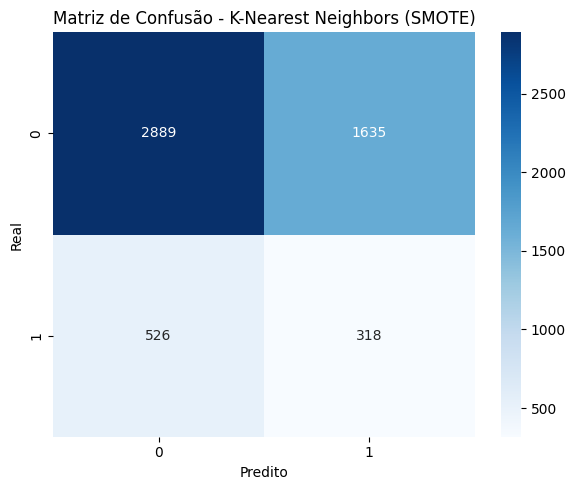


Modelo: K-Nearest Neighbors | Balanceamento: UnderSampling


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Acurácia: 0.4993
F1-Score (classe 1): 0.2280
LogLoss: 1.8481

Classification Report:
              precision    recall  f1-score   support

           0     0.8363    0.5046    0.6294      4524
           1     0.1505    0.4704    0.2280       844

    accuracy                         0.4993      5368
   macro avg     0.4934    0.4875    0.4287      5368
weighted avg     0.7284    0.4993    0.5663      5368



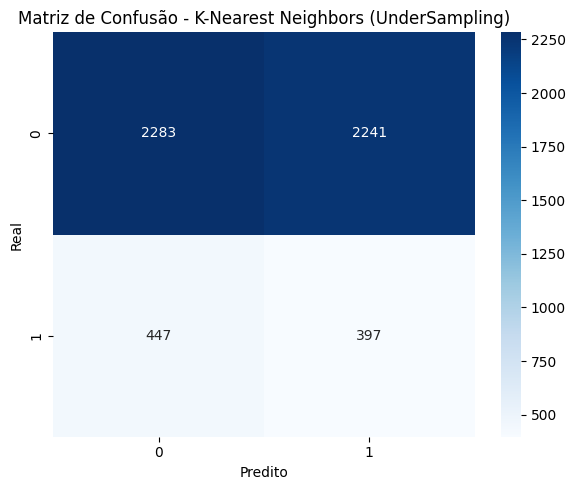


Modelo: Gradient Boosting | Balanceamento: SMOTE


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia: 0.8594
F1-Score (classe 1): 0.3092
LogLoss: 0.3803

Classification Report:
              precision    recall  f1-score   support

           0     0.8681    0.9823    0.9217      4524
           1     0.6787    0.2002    0.3092       844

    accuracy                         0.8594      5368
   macro avg     0.7734    0.5913    0.6155      5368
weighted avg     0.8384    0.8594    0.8254      5368



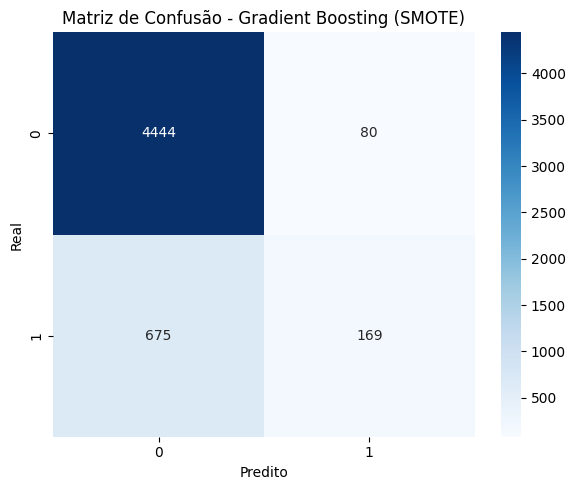


Modelo: Gradient Boosting | Balanceamento: UnderSampling


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia: 0.7018
F1-Score (classe 1): 0.4024
LogLoss: 0.5844

Classification Report:
              precision    recall  f1-score   support

           0     0.9137    0.7135    0.8013      4524
           1     0.2937    0.6386    0.4024       844

    accuracy                         0.7018      5368
   macro avg     0.6037    0.6761    0.6018      5368
weighted avg     0.8162    0.7018    0.7386      5368



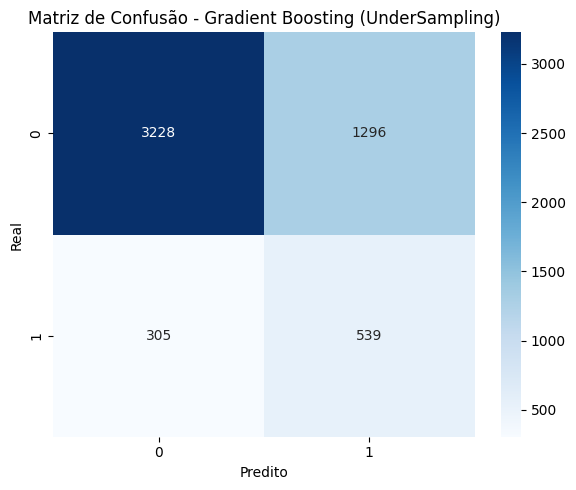


Modelo: Decision Tree | Balanceamento: SMOTE
Acurácia: 0.7621
F1-Score (classe 1): 0.2806
LogLoss: 8.5745

Classification Report:
              precision    recall  f1-score   support

           0     0.8659    0.8492    0.8575      4524
           1     0.2675    0.2950    0.2806       844

    accuracy                         0.7621      5368
   macro avg     0.5667    0.5721    0.5690      5368
weighted avg     0.7718    0.7621    0.7668      5368



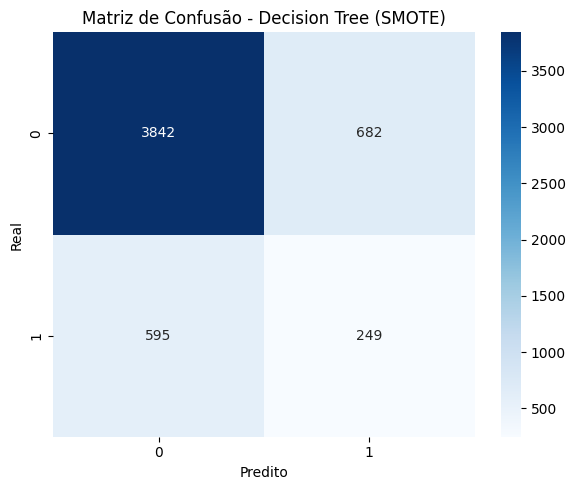


Modelo: Decision Tree | Balanceamento: UnderSampling
Acurácia: 0.5946
F1-Score (classe 1): 0.3140
LogLoss: 14.6108

Classification Report:
              precision    recall  f1-score   support

           0     0.8862    0.5955    0.7123      4524
           1     0.2139    0.5900    0.3140       844

    accuracy                         0.5946      5368
   macro avg     0.5501    0.5928    0.5132      5368
weighted avg     0.7805    0.5946    0.6497      5368



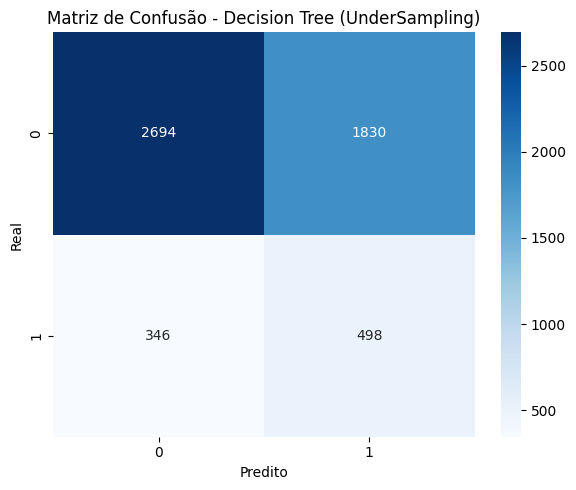


Modelo: Naive Bayes | Balanceamento: SMOTE


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia: 0.1982
F1-Score (classe 1): 0.2727
LogLoss: 1.0913

Classification Report:
              precision    recall  f1-score   support

           0     0.8741    0.0568    0.1067      4524
           1     0.1590    0.9562    0.2727       844

    accuracy                         0.1982      5368
   macro avg     0.5166    0.5065    0.1897      5368
weighted avg     0.7617    0.1982    0.1328      5368



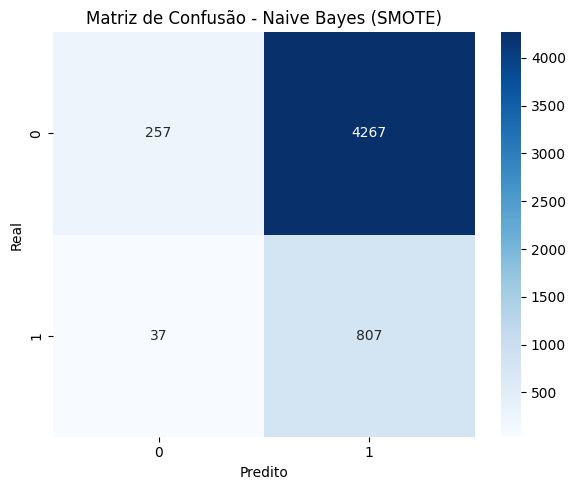


Modelo: Naive Bayes | Balanceamento: UnderSampling
Acurácia: 0.1699
F1-Score (classe 1): 0.2705
LogLoss: 0.9395

Classification Report:
              precision    recall  f1-score   support

           0     0.8269    0.0190    0.0372      4524
           1     0.1569    0.9787    0.2705       844

    accuracy                         0.1699      5368
   macro avg     0.4919    0.4988    0.1538      5368
weighted avg     0.7216    0.1699    0.0738      5368



/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


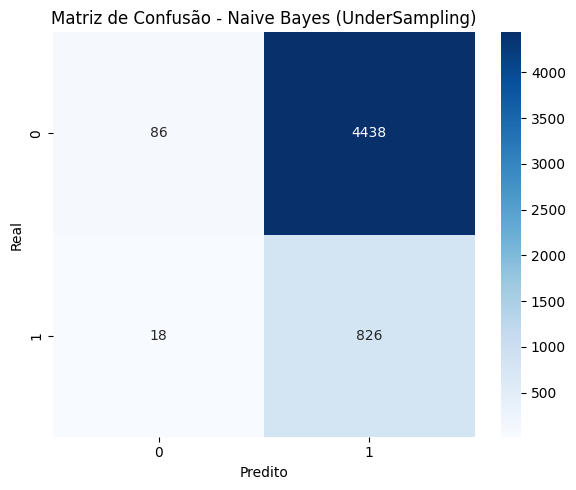


Modelo: XGBoost | Balanceamento: SMOTE


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [01:17:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Acurácia: 0.8508
F1-Score (classe 1): 0.2955
LogLoss: 0.4038

Classification Report:
              precision    recall  f1-score   support

           0     0.8668    0.9724    0.9166      4524
           1     0.5734    0.1991    0.2955       844

    accuracy                         0.8508      5368
   macro avg     0.7201    0.5857    0.6060      5368
weighted avg     0.8207    0.8508    0.8189      5368



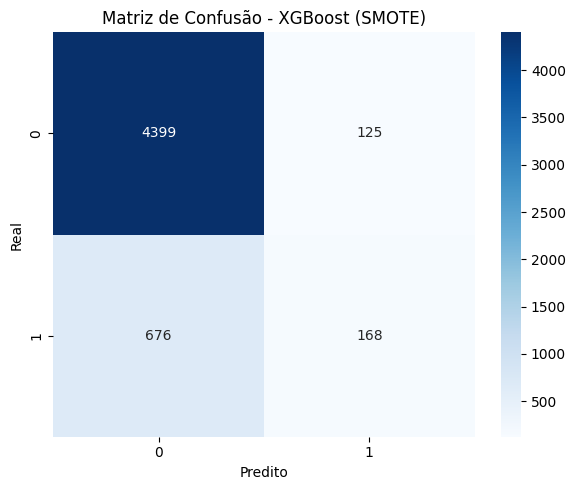


Modelo: XGBoost | Balanceamento: UnderSampling


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [01:17:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Acurácia: 0.6561
F1-Score (classe 1): 0.3608
LogLoss: 0.6664

Classification Report:
              precision    recall  f1-score   support

           0     0.9028    0.6634    0.7648      4524
           1     0.2549    0.6173    0.3608       844

    accuracy                         0.6561      5368
   macro avg     0.5789    0.6403    0.5628      5368
weighted avg     0.8010    0.6561    0.7013      5368



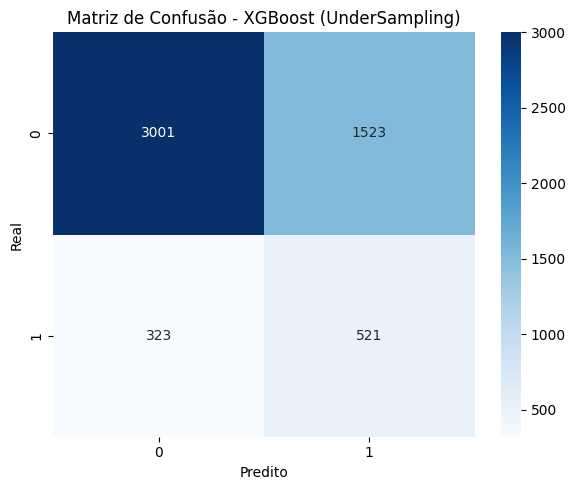


Resumo dos Resultados:
                 Modelo  Balanceamento  Acurácia  F1-Score    LogLoss
0         Decision Tree  UnderSampling  0.594635  0.313997  14.610840
1         Decision Tree          SMOTE  0.762109  0.280563   8.574468
2   K-Nearest Neighbors          SMOTE  0.597429  0.227386   4.376171
3   K-Nearest Neighbors  UnderSampling  0.499255  0.228030   1.848144
4           Naive Bayes          SMOTE  0.198212  0.272727   1.091262
5           Naive Bayes  UnderSampling  0.169896  0.270465   0.939503
6   Logistic Regression          SMOTE  0.487146  0.268792   0.691443
7   Logistic Regression  UnderSampling  0.513599  0.259291   0.689422
8               XGBoost  UnderSampling  0.656110  0.360803   0.666396
9         Random Forest  UnderSampling  0.684613  0.387260   0.593381
10    Gradient Boosting  UnderSampling  0.701751  0.402389   0.584417
11              XGBoost          SMOTE  0.850782  0.295515   0.403823
12        Random Forest          SMOTE  0.857303  0.292052   0.387

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, f1_score, log_loss, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

import xgboost as xgb

# Modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Variáveis numéricas para padronização
num_features = [
    'score_3', 'score_4', 'score_5', 'score_6', 'risk_rate', 'last_amount_borrowed', 'last_borrowed_in_months', 
    'credit_limit', 'income', 'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'n_issues', 
    'application_time_in_funnel', 'external_data_provider_credit_checks_last_month', 
    'external_data_provider_credit_checks_last_year', 'external_data_provider_email_seen_before', 
    'external_data_provider_fraud_score', 'reported_income'
]

# Separar treino/teste
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=42)

# Resultados
results = []

# Balanceadores
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "UnderSampling": RandomUnderSampler(random_state=42)
}

# Loop principal
for name, model in models.items():
    for method_name, sampler in resamplers.items():
        print(f"\n{'='*60}\nModelo: {name} | Balanceamento: {method_name}")
        
        # Pipeline
        pipeline = ImbPipeline(steps=[
            ("scaler", ColumnTransformer([
                ("num", StandardScaler(), num_features)
            ], remainder='passthrough')),
            ("sampler", sampler),
            ("classifier", model)
        ])

        # Treinamento
        pipeline.fit(X_train_split, y_train_split)
        
        # Previsões
        y_pred = pipeline.predict(X_val)
        
        # Probabilidades (classe 1)
        if hasattr(pipeline.named_steps["classifier"], "predict_proba"):
            y_proba = pipeline.predict_proba(X_val)
            if y_proba.shape[1] == 2:
                y_proba_1 = y_proba[:, 1]
            else:
                y_proba_1 = np.zeros_like(y_pred, dtype=float)
        else:
            y_proba_1 = np.zeros_like(y_pred, dtype=float)
        
        # Métricas
        acc = accuracy_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred, pos_label=1)
        logloss = log_loss(y_val, y_proba_1, labels=[0, 1])

        # Salva os resultados
        results.append({
            "Modelo": name,
            "Balanceamento": method_name,
            "Acurácia": acc,
            "F1-Score": f1,
            "LogLoss": logloss
        })

        # Prints
        print(f"Acurácia: {acc:.4f}")
        print(f"F1-Score (classe 1): {f1:.4f}")
        print(f"LogLoss: {logloss:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_val, y_pred, digits=4))
        
        # Calcular a matriz de confusão
        cm = confusion_matrix(y_val, y_pred)
        
        # Matriz de confusão (gráfico)
        # Plotar a matriz de confusão com seaborn
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["0", "1"], yticklabels=["0", "1"])
        plt.title(f"Matriz de Confusão - {name} ({method_name})")
        plt.xlabel('Predito')
        plt.ylabel('Real')
        plt.tight_layout()
        plt.show()

# Resultados finais
results_df = pd.DataFrame(results)
print("\nResumo dos Resultados:")
print(results_df.sort_values(by="LogLoss", ascending=False).reset_index(drop=True))



Balanceamento: SMOTE


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Importância das Features:
                                            Feature  Importance
14                                          score_2    0.195110
55                            facebook_profile_True    0.149258
78                  application_time_category_00-06    0.069337
17                                       user_agent    0.069231
76                        marketing_channel_Website    0.059564
15                                            state    0.029218
54                           facebook_profile_False    0.024742
47                 score_1_1Rk8w4Ucd5yR3KcqZzLdow==    0.023256
49                 score_1_8k8UDR4Yx0qasAjkGrUZLw==    0.022502
40                                           tag_n5    0.018680
16                                   shipping_state    0.018102
31                                          tag_n14    0.017613
50                 score_1_DGCQep2AE5QRkNCshIAlFQ==    0.015990
48                 score_1_4DLlLW62jReXaqbPaHp1vQ==    0.015286
38           

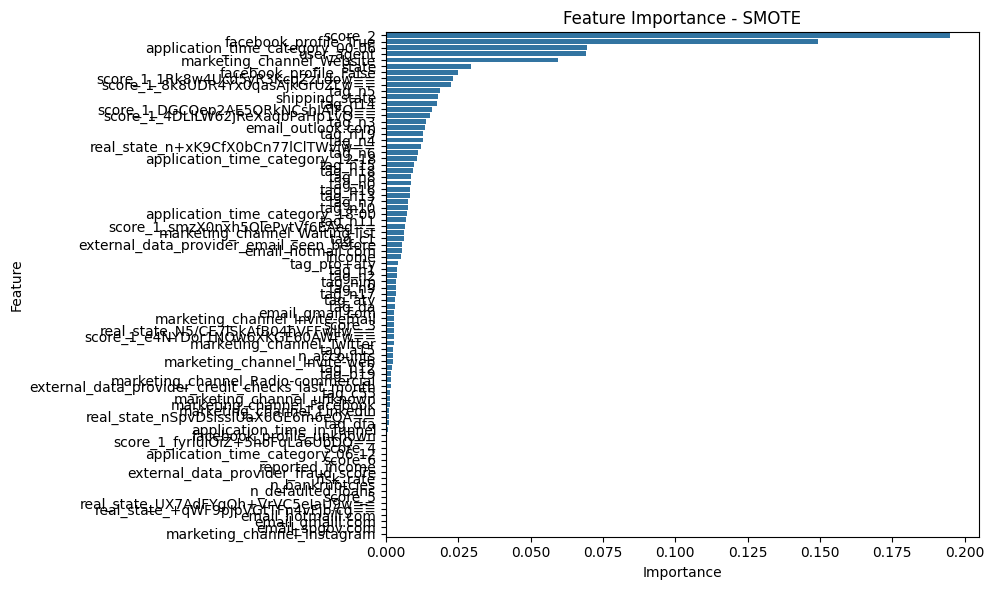


Resumo dos Resultados:


,Balanceamento,Acurácia,F1-Score,LogLoss
0,SMOTE,0.841899,0.274443,0.407308


In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# Modelos
model = GradientBoostingClassifier(random_state=42)
#model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Variáveis numéricas para padronização
num_features = [
    'score_3', 'score_4', 'score_5', 'score_6', 'risk_rate', 'income', 
    'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'application_time_in_funnel',
    'external_data_provider_credit_checks_last_month', 
    'external_data_provider_email_seen_before', 'external_data_provider_fraud_score',
    'reported_income'
]

# Separar treino/teste
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=42)

# Balanceadores
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    #"UnderSampling": RandomUnderSampler(random_state=42)
}

# Resultados
results = []

# Loop principal
for method_name, sampler in resamplers.items():
    print(f"\n{'='*60}\nBalanceamento: {method_name}")

    # Pipeline
    pipeline = ImbPipeline(steps=[
        ("scaler", ColumnTransformer([
            ("num", StandardScaler(), num_features)
        ], remainder='passthrough')),
        ("sampler", sampler),
        ("classifier", model)
    ])

    # Treinamento
    pipeline.fit(X_train_split, y_train_split)
    
    # Previsões
    y_pred = pipeline.predict(X_val)
    
    # Probabilidades (classe 1)
    if hasattr(pipeline.named_steps["classifier"], "predict_proba"):
        y_proba = pipeline.predict_proba(X_val)
        if y_proba.shape[1] == 2:
            y_proba_1 = y_proba[:, 1]
        else:
            y_proba_1 = np.zeros_like(y_pred, dtype=float)
    else:
        y_proba_1 = np.zeros_like(y_pred, dtype=float)
    
    # Métricas
    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, pos_label=1)
    logloss = log_loss(y_val, y_proba_1, labels=[0, 1])

    # Salva os resultados
    results.append({
        "Balanceamento": method_name,
        "Acurácia": acc,
        "F1-Score": f1,
        "LogLoss": logloss
    })

    # Feature importance com XGBoost
    feature_importance = pipeline.named_steps["classifier"].feature_importances_
    feature_names = num_features + [col for col in X_train_split.columns if col not in num_features]

    # Criando o DataFrame da importância das features
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importance
    }).sort_values(by='Importance', ascending=False)

    # Exibindo o dataframe completo da importância das features
    print("\nImportância das Features:")
    print(feature_importance_df)

    # Plotando a importância das features
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title(f'Feature Importance - {method_name}')
    plt.tight_layout()
    plt.show()


# Exibir todas as linhas do DataFrame
pd.set_option('display.max_rows', None)

# Resultados finais
results_df = pd.DataFrame(results)
print("\nResumo dos Resultados:")
results_df.sort_values(by="F1-Score", ascending=False).reset_index(drop=True)


In [129]:
# Selecionar features com importância mínima
important_features = feature_importance_df[feature_importance_df['Importance'] > 0.005]['Feature']
X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]


In [130]:
X_train_reduced.head()

,score_2,facebook_profile_True,application_time_category_00-06,user_agent,marketing_channel_Website,state,facebook_profile_False,score_1_1Rk8w4Ucd5yR3KcqZzLdow==,score_1_8k8UDR4Yx0qasAjkGrUZLw==,tag_n5,shipping_state,tag_n14,score_1_DGCQep2AE5QRkNCshIAlFQ==,score_1_4DLlLW62jReXaqbPaHp1vQ==,tag_n3,email_outlook.com,tag_n19,tag_n4,real_state_n+xK9CfX0bCn77lClTWviw==,tag_n6,application_time_category_12-18,tag_n15,tag_n18,tag_n8,tag_n0,tag_n16,tag_n13,tag_n7,tag_n10,application_time_category_18-00,tag_n11,score_1_smzX0nxh5QlePvtVf6EAeg==,marketing_channel_Waiting-list,tag_c1,external_data_provider_email_seen_before,email_hotmail.com,income
0,0.131075,1,1,0.184713,1,0.151311,0,0,0,0,0.164371,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.0,1,22535.71
1,0.158378,0,0,0.108336,0,0.161776,1,1,0,0,0.144665,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,39.0,0,42202.03
2,0.148619,1,1,0.118646,0,0.167228,0,1,0,0,0.137453,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2.0,0,65328.74
3,0.253653,1,0,0.255319,0,0.135646,0,0,1,0,0.219005,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,10.0,1,60037.45
4,0.097752,0,0,0.238410,0,0.135646,1,0,0,0,0.137931,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,53.0,0,74022.08



Modelo: Logistic Regression | Balanceamento: SMOTE


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia: 0.6776
F1-Score (classe 1): 0.3806
LogLoss: 0.5895

Classification Report:
              precision    recall  f1-score   support

           0     0.9077    0.6871    0.7821      4506
           1     0.2732    0.6272    0.3806       845

    accuracy                         0.6776      5351
   macro avg     0.5904    0.6572    0.5814      5351
weighted avg     0.8075    0.6776    0.7187      5351



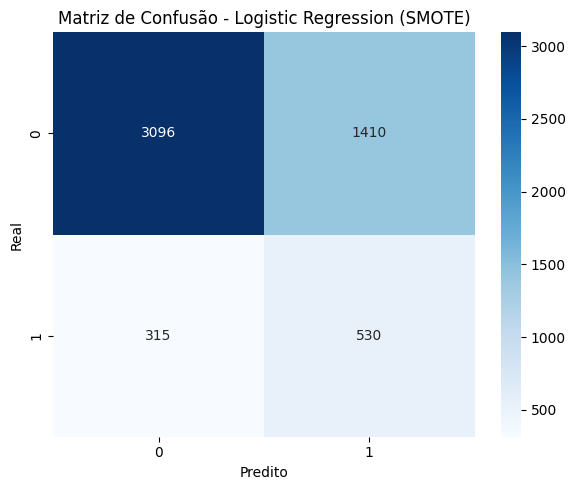


Modelo: Logistic Regression | Balanceamento: UnderSampling


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia: 0.6681
F1-Score (classe 1): 0.3889
LogLoss: 0.6042

Classification Report:
              precision    recall  f1-score   support

           0     0.9149    0.6680    0.7722      4506
           1     0.2741    0.6686    0.3889       845

    accuracy                         0.6681      5351
   macro avg     0.5945    0.6683    0.5805      5351
weighted avg     0.8137    0.6681    0.7117      5351



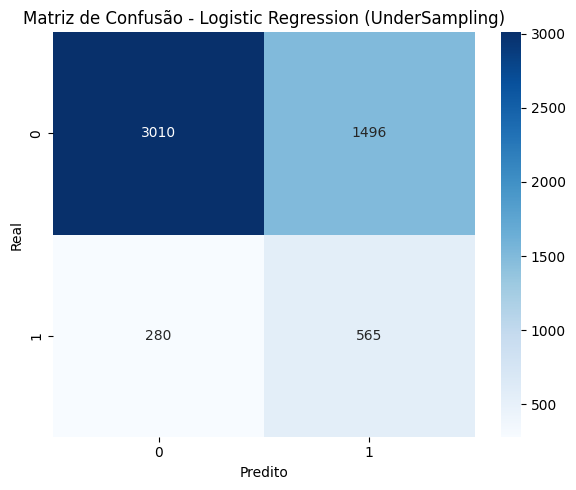


Modelo: Random Forest | Balanceamento: SMOTE


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Acurácia: 0.8294
F1-Score (classe 1): 0.2961
LogLoss: 0.4218

Classification Report:
              precision    recall  f1-score   support

           0     0.8667    0.9423    0.9029      4506
           1     0.4248    0.2272    0.2961       845

    accuracy                         0.8294      5351
   macro avg     0.6457    0.5848    0.5995      5351
weighted avg     0.7969    0.8294    0.8071      5351



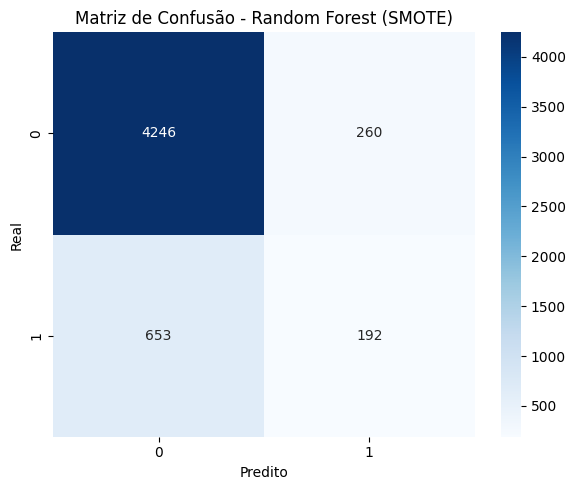


Modelo: Random Forest | Balanceamento: UnderSampling


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Acurácia: 0.6599
F1-Score (classe 1): 0.3746
LogLoss: 0.6164

Classification Report:
              precision    recall  f1-score   support

           0     0.9087    0.6627    0.7664      4506
           1     0.2639    0.6450    0.3746       845

    accuracy                         0.6599      5351
   macro avg     0.5863    0.6538    0.5705      5351
weighted avg     0.8069    0.6599    0.7045      5351



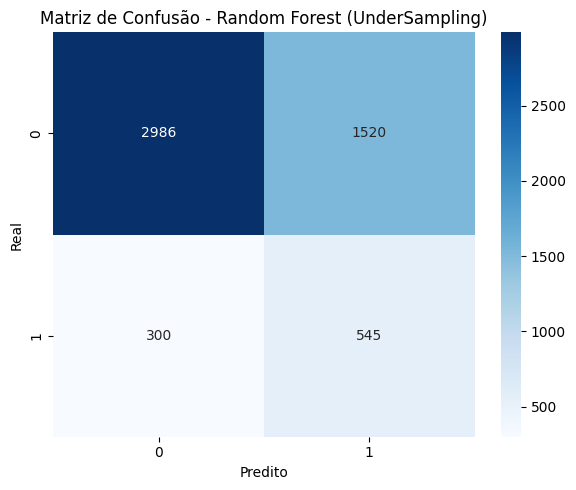


Modelo: K-Nearest Neighbors | Balanceamento: SMOTE


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Acurácia: 0.6126
F1-Score (classe 1): 0.3106
LogLoss: 4.7219

Classification Report:
              precision    recall  f1-score   support

           0     0.8815    0.6238    0.7306      4506
           1     0.2160    0.5527    0.3106       845

    accuracy                         0.6126      5351
   macro avg     0.5487    0.5882    0.5206      5351
weighted avg     0.7764    0.6126    0.6643      5351



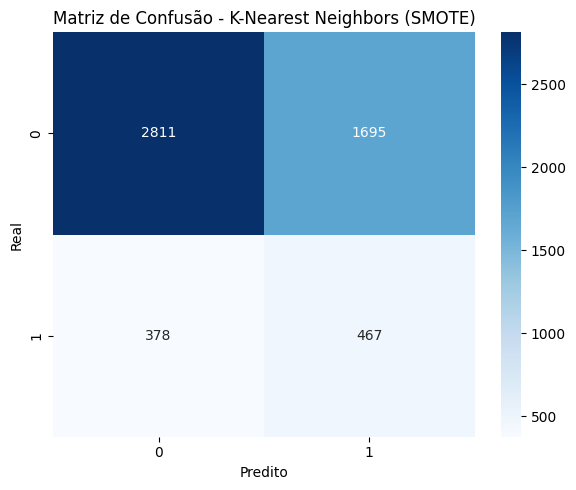


Modelo: K-Nearest Neighbors | Balanceamento: UnderSampling


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Acurácia: 0.5812
F1-Score (classe 1): 0.3128
LogLoss: 2.1722

Classification Report:
              precision    recall  f1-score   support

           0     0.8859    0.5770    0.6988      4506
           1     0.2111    0.6036    0.3128       845

    accuracy                         0.5812      5351
   macro avg     0.5485    0.5903    0.5058      5351
weighted avg     0.7793    0.5812    0.6379      5351



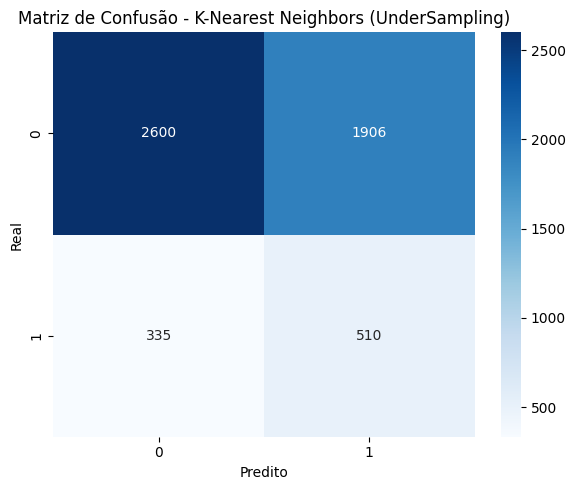


Modelo: Gradient Boosting | Balanceamento: SMOTE


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia: 0.8114
F1-Score (classe 1): 0.3713
LogLoss: 0.4481

Classification Report:
              precision    recall  f1-score   support

           0     0.8809    0.8975    0.8891      4506
           1     0.3921    0.3527    0.3713       845

    accuracy                         0.8114      5351
   macro avg     0.6365    0.6251    0.6302      5351
weighted avg     0.8037    0.8114    0.8073      5351



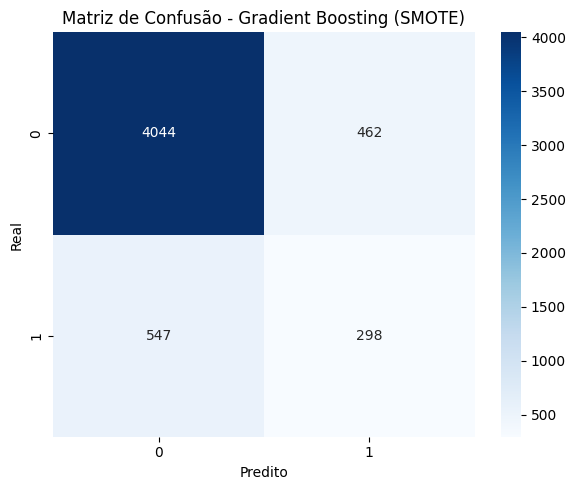


Modelo: Gradient Boosting | Balanceamento: UnderSampling


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia: 0.6582
F1-Score (classe 1): 0.3794
LogLoss: 0.6075

Classification Report:
              precision    recall  f1-score   support

           0     0.9120    0.6576    0.7642      4506
           1     0.2659    0.6615    0.3794       845

    accuracy                         0.6582      5351
   macro avg     0.5890    0.6596    0.5718      5351
weighted avg     0.8100    0.6582    0.7034      5351



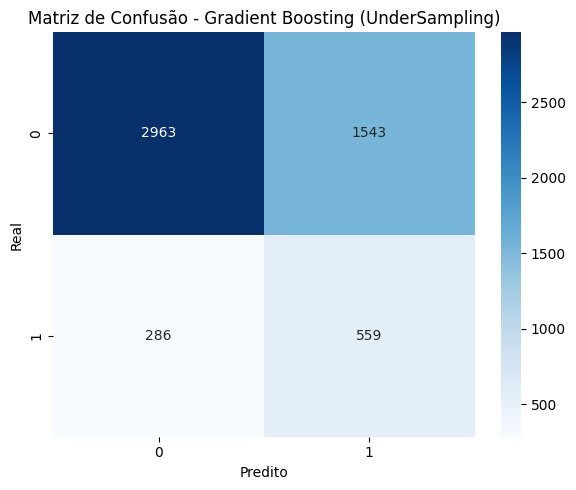


Modelo: Decision Tree | Balanceamento: SMOTE
Acurácia: 0.7320
F1-Score (classe 1): 0.2699
LogLoss: 9.6592

Classification Report:
              precision    recall  f1-score   support

           0     0.8629    0.8105    0.8359      4506
           1     0.2368    0.3136    0.2699       845

    accuracy                         0.7320      5351
   macro avg     0.5499    0.5620    0.5529      5351
weighted avg     0.7641    0.7320    0.7465      5351



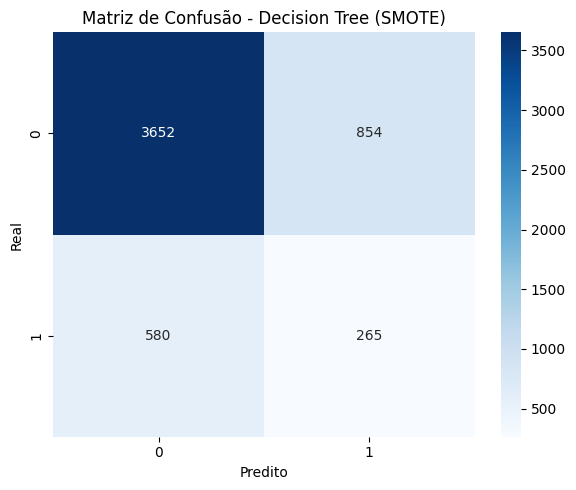


Modelo: Decision Tree | Balanceamento: UnderSampling
Acurácia: 0.5750
F1-Score (classe 1): 0.3029
LogLoss: 15.3174

Classification Report:
              precision    recall  f1-score   support

           0     0.8804    0.5732    0.6944      4506
           1     0.2044    0.5846    0.3029       845

    accuracy                         0.5750      5351
   macro avg     0.5424    0.5789    0.4986      5351
weighted avg     0.7736    0.5750    0.6325      5351



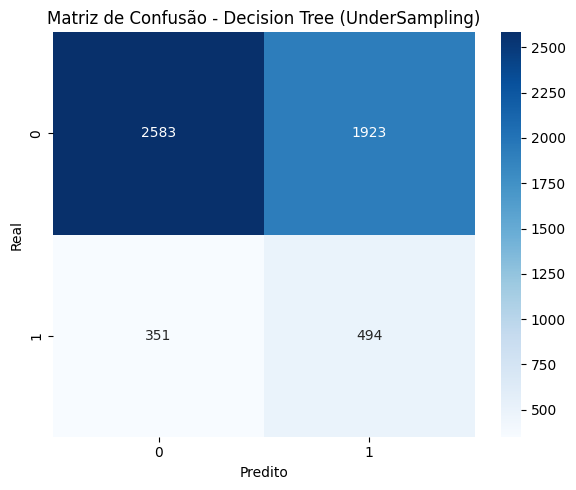


Modelo: Naive Bayes | Balanceamento: SMOTE


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia: 0.6561
F1-Score (classe 1): 0.3270
LogLoss: 1.3352

Classification Report:
              precision    recall  f1-score   support

           0     0.8850    0.6800    0.7691      4506
           1     0.2366    0.5290    0.3270       845

    accuracy                         0.6561      5351
   macro avg     0.5608    0.6045    0.5480      5351
weighted avg     0.7826    0.6561    0.6993      5351



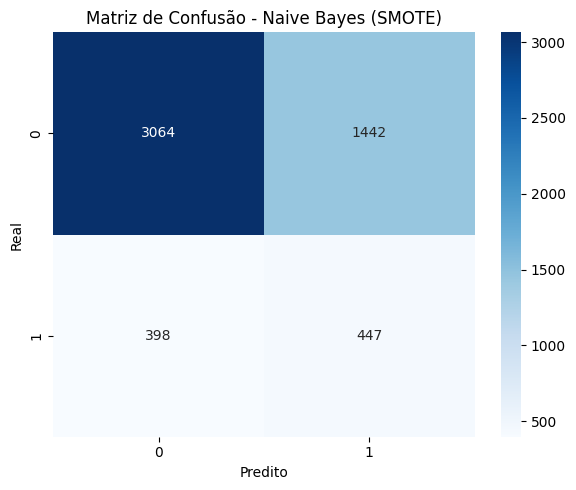


Modelo: Naive Bayes | Balanceamento: UnderSampling
Acurácia: 0.6287
F1-Score (classe 1): 0.3666
LogLoss: 1.1039

Classification Report:
              precision    recall  f1-score   support

           0     0.9117    0.6190    0.7373      4506
           1     0.2509    0.6805    0.3666       845

    accuracy                         0.6287      5351
   macro avg     0.5813    0.6497    0.5520      5351
weighted avg     0.8074    0.6287    0.6788      5351



/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


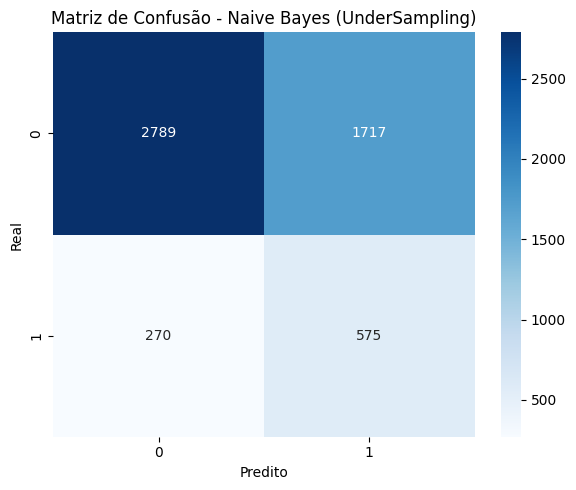


Modelo: XGBoost | Balanceamento: SMOTE


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:05:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Acurácia: 0.8410
F1-Score (classe 1): 0.2542
LogLoss: 0.4046

Classification Report:
              precision    recall  f1-score   support

           0     0.8615    0.9665    0.9110      4506
           1     0.4899    0.1716    0.2542       845

    accuracy                         0.8410      5351
   macro avg     0.6757    0.5690    0.5826      5351
weighted avg     0.8028    0.8410    0.8073      5351



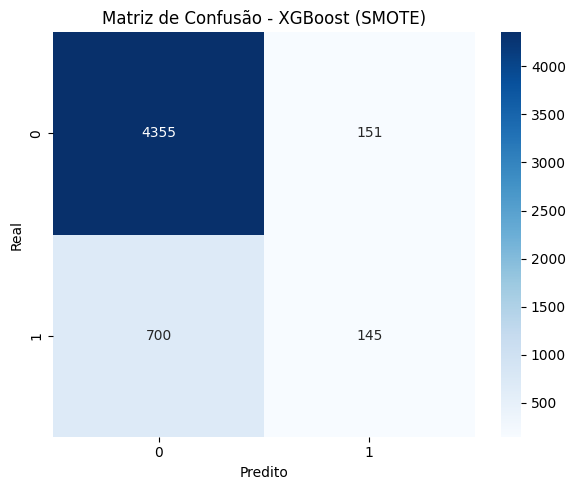


Modelo: XGBoost | Balanceamento: UnderSampling


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:05:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Acurácia: 0.6335
F1-Score (classe 1): 0.3526
LogLoss: 0.7067

Classification Report:
              precision    recall  f1-score   support

           0     0.9018    0.6338    0.7444      4506
           1     0.2445    0.6320    0.3526       845

    accuracy                         0.6335      5351
   macro avg     0.5732    0.6329    0.5485      5351
weighted avg     0.7980    0.6335    0.6826      5351



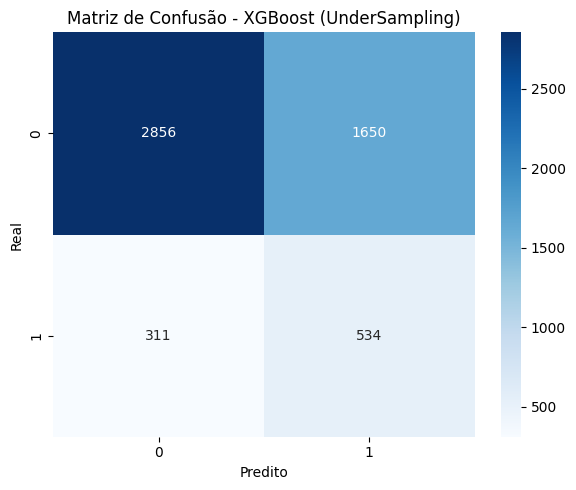


Resumo dos Resultados:
                 Modelo  Balanceamento  Acurácia  F1-Score    LogLoss
0         Decision Tree  UnderSampling  0.575033  0.302882  15.317374
1         Decision Tree          SMOTE  0.732013  0.269857   9.659241
2   K-Nearest Neighbors          SMOTE  0.612596  0.310609   4.721886
3   K-Nearest Neighbors  UnderSampling  0.581200  0.312787   2.172211
4           Naive Bayes          SMOTE  0.656139  0.326993   1.335179
5           Naive Bayes  UnderSampling  0.628668  0.366592   1.103851
6               XGBoost  UnderSampling  0.633526  0.352592   0.706712
7         Random Forest  UnderSampling  0.659877  0.374570   0.616424
8     Gradient Boosting  UnderSampling  0.658195  0.379369   0.607536
9   Logistic Regression  UnderSampling  0.668099  0.388851   0.604184
10  Logistic Regression          SMOTE  0.677630  0.380610   0.589508
11    Gradient Boosting          SMOTE  0.811437  0.371340   0.448080
12        Random Forest          SMOTE  0.829378  0.296068   0.421

In [132]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, f1_score, log_loss, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

import xgboost as xgb

# Modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Variáveis numéricas para padronização
num_features = [
    'score_3', 'score_4', 'score_5', 'score_6', 'risk_rate', 'income', 
    'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'application_time_in_funnel',
    'external_data_provider_credit_checks_last_month', 
    'external_data_provider_email_seen_before', 'external_data_provider_fraud_score',
    'reported_income'
]


num_features = [col for col in num_features if col in X_train_split.columns]

# Separar treino/teste
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_reduced, y_train, stratify=y_train, test_size=0.2, random_state=42)

# Resultados
results = []

# Balanceadores
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "UnderSampling": RandomUnderSampler(random_state=42)
}

# Loop principal
for name, model in models.items():
    for method_name, sampler in resamplers.items():
        print(f"\n{'='*60}\nModelo: {name} | Balanceamento: {method_name}")
        
        # Pipeline
        pipeline = ImbPipeline(steps=[
            ("scaler", ColumnTransformer([
                ("num", StandardScaler(), num_features)
            ], remainder='passthrough')),
            ("sampler", sampler),
            ("classifier", model)
        ])

        # Treinamento
        pipeline.fit(X_train_split, y_train_split)
        
        # Previsões
        y_pred = pipeline.predict(X_val)
        
        # Probabilidades (classe 1)
        if hasattr(pipeline.named_steps["classifier"], "predict_proba"):
            y_proba = pipeline.predict_proba(X_val)
            if y_proba.shape[1] == 2:
                y_proba_1 = y_proba[:, 1]
            else:
                y_proba_1 = np.zeros_like(y_pred, dtype=float)
        else:
            y_proba_1 = np.zeros_like(y_pred, dtype=float)
        
        # Métricas
        acc = accuracy_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred, pos_label=1)
        logloss = log_loss(y_val, y_proba_1, labels=[0, 1])

        # Salva os resultados
        results.append({
            "Modelo": name,
            "Balanceamento": method_name,
            "Acurácia": acc,
            "F1-Score": f1,
            "LogLoss": logloss
        })

        # Prints
        print(f"Acurácia: {acc:.4f}")
        print(f"F1-Score (classe 1): {f1:.4f}")
        print(f"LogLoss: {logloss:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_val, y_pred, digits=4))
        
        # Calcular a matriz de confusão
        cm = confusion_matrix(y_val, y_pred)
        
        # Matriz de confusão (gráfico)
        # Plotar a matriz de confusão com seaborn
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["0", "1"], yticklabels=["0", "1"])
        plt.title(f"Matriz de Confusão - {name} ({method_name})")
        plt.xlabel('Predito')
        plt.ylabel('Real')
        plt.tight_layout()
        plt.show()

# Resultados finais
results_df = pd.DataFrame(results)
print("\nResumo dos Resultados:")
print(results_df.sort_values(by="LogLoss", ascending=False).reset_index(drop=True))


In [134]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, f1_score

# Classificador
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

# Pipeline com SMOTE
pipeline = ImbPipeline([
    ("smote", SMOTE(random_state=42)),
    ("classifier", xgb)
])

# Hiperparâmetros
param_grid = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [3, 5],
    "classifier__learning_rate": [0.01, 0.1],
    "classifier__subsample": [0.8, 1.0],
    "classifier__colsample_bytree": [0.8, 1.0]
}

# Métricas
scoring = {
    'f1': make_scorer(f1_score),
    'log_loss': 'neg_log_loss'
}

# Grid Search
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=scoring,
    refit='f1',  # modelo final será escolhido pelo maior F1
    cv=5,
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

# Treinamento
grid_search.fit(X_train_reduced, y_train)

# Resultados
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor F1-score:", grid_search.cv_results_['mean_test_f1'][grid_search.best_index_])
print("Log Loss correspondente:", -grid_search.cv_results_['mean_test_log_loss'][grid_search.best_index_])


Fitting 5 folds for each of 32 candidates, totalling 160 fits


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:11:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:11:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:11:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/x

Melhores parâmetros: {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__subsample': 0.8}
Melhor F1-score: 0.3574426490384008
Log Loss correspondente: 0.5569906966663831


## Choosing the best Models

In churn analysis, our main goal is to **correctly identify customers who will cancel**, as this allows the company to take preventive actions to retain them. For this reason, **Recall will be our main metric**, as it measures the proportion of customers who actually canceled and who were correctly classified by the model.

However, **we will also evaluate Precision** in the background, as it helps us ensure that, when predicting churn, **we are minimizing false positives, avoiding unnecessary alarms**.

The goal is to **choose 2 models**. Random Forest, Logistic regression and Decision tree had the best recall rate, but the Logistic regression model had a lower precision rate. Therefore, **Random Forest and Decision tree will be chosen for the next stage**.

##Hyperparameters Tuning

Hyperparameter tuning is **select the best combination of hyperparameters** (e.g., number of estimators, learning rate, or tree depth) that allow the model to generalize well to unseen data, **maximizing its predictive accuracy while minimizing overfitting**.


To this **RandomizedSearchCV will be used**. It randomly samples from the specified hyperparameter space for a given number of iterations and evaluates each combination using cross-validation. RandomizedSearch helps to identify the best performing hyperparameters for the model, balancing accuracy and computational efficiency.

##Ensemble

In this section, **the two models will be combined to improve the performance** of the final model.

The **voting classifier** is an effective way to combine models, where each model contributes its prediction and the final decision is based on the majority or average of the predictions.

The **recall rate of the ensemble model was very close** to that of the Decision tree model with hyperparameters, which had the highest recall rate. In addition, the **ensemble model had higher precision and accuracy rates** than the Decision tree model with hyperparameters.

#Evaluation

Now we will perform the **final evaluation of the ensemble model** using the **test data,** which were separated before modeling.

Model evaluation shows **promising results**. After fine-tuning the hyperparameters of the Random Forest and Decision Tree models, their performance was further improved when combined into an ensemble. The final ensemble model demonstrated **strong recall (0.778)**, precision (0.717), and accuracy (0.922) on the test data, indicating its robustness in predicting churn. This performance suggests that the ensemble approach, leveraging the strengths of both models, **is effective for the task at hand and can be trusted for future predictions**.

With these results, **the model is now ready for deployment.** By integrating it into an application, users will be able to input customer data and receive a churn probability score in real-time. This will enable businesses to proactively identify at-risk customers and implement targeted retention strategies. **The model's strong performance ensures that it can be a valuable tool for decision-making,** helping to minimize churn and improve customer satisfaction.